# <center> Review IMDB

### <b> Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split

import nltk    #Natural language processing tool-kit
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import tensorflow as tf

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonydavidasroch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
os.getcwd()

'/Users/anthonydavidasroch/Documents/IMDB Review'

### <b> import dataset

In [3]:
train_path = os.getcwd() + '/aclImdb/train/'
files_train_neg = glob.glob(train_path + '/neg/*.txt')
files_train_pos = glob.glob(train_path + '/pos/*.txt')

In [4]:
test_path = os.getcwd() + '/aclImdb/test/'
files_test_neg = glob.glob(test_path + '/neg/*.txt')
files_test_pos = glob.glob(test_path + '/pos/*.txt')

In [5]:
def arrange_data(files, label, lenght):
    tab = []
    for file in files[:lenght]:
        tab.append(open(file, "r").read())
    df = pd.DataFrame(tab, columns = ['Review'])
    df['Label'] = label
    return df

In [6]:
train = arrange_data(files_train_neg, 0, 6000).append(arrange_data(files_train_pos, 1, 6000))
#test = arrange_data(files_test_neg, 0, 1500).append(arrange_data(files_test_pos, 1, 1500))

In [7]:
print('Review :', train['Review'].iloc[2], '\nLabel :', train['Label'].iloc[2])
print()
print('Review :', train['Review'].iloc[-1], '\nLabel :', train['Label'].iloc[-1])

Review : Ouch! This one was a bit painful to sit through. It has a cute and amusing premise, but it all goes to hell from there. Matthew Modine is almost always pedestrian and annoying, and he does not disappoint in this one. Deborah Kara Unger and John Neville turned in surprisingly decent performances. Alan Bates and Jennifer Tilly, among others, played it way over the top. I know that's the way the parts were written, and it's hard to blame actors, when the script and director have them do such schlock. If you're going to have outrageous characters, that's OK, but you gotta have good material to make it work. It didn't here. Run away screaming from this movie if at all possible. 
Label : 0

Review : An unassuming, subtle and lean film, "The Man in the White Suit" is yet another breath of fresh air in filmic format from Ealing studios. While I suspect some modern viewers may initially find it obscure, I doubt many would fail to be charmed by the expert way the plot, the themes and ch

In [8]:
print(train.dtypes)

Review    object
Label      int64
dtype: object


In [9]:
train['Label']=train['Label'].astype('category')
#test['Label']=test['Label'].astype('category')

In [10]:
print(train.dtypes)

Review      object
Label     category
dtype: object


### <b> Répartition de Label

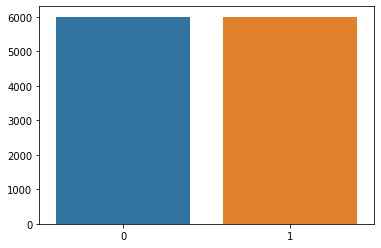

In [11]:
sns.barplot(np.unique(train['Label']),train.groupby('Label').count().values[:,0])

### <b> Put the text in lowercap and takeout ponctuation

In [12]:
train['Review'] = train['Review'].str.replace(r'[^\w\s]+', '')
train['Review'] = train['Review'].str.lower()

#test['Review'] = test['Review'].str.replace(r'[^\w\s]+', '')
#test['Review'] = test['Review'].str.lower()

### <b> Takeout stop word

In [13]:
stop = set(stopwords.words('english'))

In [14]:
stop_word = list(stop)

In [15]:
train.Review.iloc[1]

'welltremors i the original started off in 1990 and i found the movie quite enjoyable to watch however they proceeded to make tremors ii and iii trust me those movies started going downhill right after they finished the first one i mean ass blasters now only god himself is capable of answering the question why in gods name would they create another one of these dumpster dives of a movie tremors iv cannot be considered a bad movie in fact it cannot be even considered an epitome of a bad movie for it lives up to more than that as i attempted to sit though it i noticed that my eyes started to bleed and i hoped profusely that the little girl from the ring would crawl through the tv and kill me did they really think that dressing the people who had stared in the other movies up as though they were from the wild west would make the movie with the exact same occurrences any better honestly i would never suggest buying this movie i mean there are cheaper ways to find things that burn well'

In [16]:
l = ''
for i in [x for x in train.Review.iloc[1].split() if x not in stop_word]:
    l = l + ' ' + i
l

' welltremors original started 1990 found movie quite enjoyable watch however proceeded make tremors ii iii trust movies started going downhill right finished first one mean ass blasters god capable answering question gods name would create another one dumpster dives movie tremors iv cannot considered bad movie fact cannot even considered epitome bad movie lives attempted sit though noticed eyes started bleed hoped profusely little girl ring would crawl tv kill really think dressing people stared movies though wild west would make movie exact occurrences better honestly would never suggest buying movie mean cheaper ways find things burn well'

### <b> CountVectorizer and TF IDF

In [17]:
countvec = CountVectorizer(stop_words=stop)
countvec_fit = countvec.fit_transform(train.Review)

In [18]:
train_countvec = countvec_fit.toarray()

In [19]:
tfidfvec = TfidfVectorizer(stop_words=stop)
tfidfvec_fit = tfidfvec.fit_transform(train.Review)

In [20]:
train_tfidf = tfidfvec_fit.toarray()

In [21]:
'''
countvec_fit_test = countvec.fit_transform(test.Review)
test_countvec = countvec_fit_test.toarray()

tfidfvec_fit_test = tfidfvec.fit_transform(test.Review)
test_tfidf = tfidfvec_fit_test.toarray()
'''

'\ncountvec_fit_test = countvec.fit_transform(test.Review)\ntest_countvec = countvec_fit_test.toarray()\n\ntfidfvec_fit_test = tfidfvec.fit_transform(test.Review)\ntest_tfidf = tfidfvec_fit_test.toarray()\n'

In [22]:
print('CountVec shape :', train_countvec.shape)
#print('TF IDF shape :', train_tfidf.shape)

CountVec shape : (12000, 81600)


In [22]:
#X_train = train_countvec

In [23]:
def labels(x):
    if x==0:
        return 1,0
    else:
        return 0,1
train['Label bad'] = train['Label'].apply(lambda x: 1. if x==0 else 0.).astype('float32')
train['Label good'] = train['Label'].apply(lambda x: 1. if x==1 else 0.).astype('float32')
train = train.reset_index(drop=True) 

In [24]:
tmp_label = np.array(train[['Label bad','Label good']]).reshape((train_countvec.shape[0],2))

In [25]:
#Y_train = np.array(train[['Label bad','Label good']]).reshape((train_countvec.shape[0],2))

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(train_countvec, tmp_label)

In [27]:
'''
X_test = test_countvec

test['Label bad'] = test['Label'].apply(lambda x: 1. if x==0 else 0.).astype('float32')
test['Label good'] = test['Label'].apply(lambda x: 1. if x==1 else 0.).astype('float32')
test = test.reset_index(drop=True) 
Y_test = np.array(test[['Label bad','Label good']]).reshape((test_countvec.shape[0],2))
'''

"\nX_test = test_countvec\n\ntest['Label bad'] = test['Label'].apply(lambda x: 1. if x==0 else 0.).astype('float32')\ntest['Label good'] = test['Label'].apply(lambda x: 1. if x==1 else 0.).astype('float32')\ntest = test.reset_index(drop=True) \nY_test = np.array(test[['Label bad','Label good']]).reshape((test_countvec.shape[0],2))\n"

### <b> Simple Neural Network

In [28]:
num_samples, num_features = X_train.shape

In [30]:
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32, shape=[None, num_features], name='Input')
Y = tf.compat.v1.placeholder(tf.float32, shape=[None, 2], name='Target')

w1 = tf.Variable(tf.random.truncated_normal(shape=[num_features, 512], dtype=tf.float32, seed=42, name='w1'))
b1 = tf.Variable(tf.constant(0.1, dtype=tf.float32, shape=[512], name='b1'))
layer1 = tf.math.add(tf.linalg.matmul(X, w1), b1)

w2 = tf.Variable(tf.random.truncated_normal(shape=[layer1.shape[1], 256], dtype=tf.dtypes.float32, seed=42, name='w2'))
b2 = tf.Variable(tf.constant(0.1, dtype=tf.float32, shape=[256], name='b2'))
layer2 = tf.math.add(tf.linalg.matmul(layer1, w2), b2)

w3 = tf.Variable(tf.random.truncated_normal(shape=[layer2.shape[1], 128], dtype=tf.dtypes.float32, seed=42, name='w3'))
b3 = tf.Variable(tf.constant(0.1, dtype=tf.float32, shape=[128], name='b3'))
layer3 = tf.math.add(tf.linalg.matmul(layer2, w3), b3)

w_out = tf.Variable(tf.random.truncated_normal(shape=[layer3.shape[1], 2], dtype=tf.dtypes.float32, seed=42, name='w_out'))
b_out = tf.Variable(tf.constant(0.1, dtype=tf.float32, shape=[2], name='b_out'))
layer_out = tf.math.add(tf.linalg.matmul(layer3, w_out), b_out)


cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(Y, layer_out)
loss = tf.reduce_mean(cross_entropy)

good_pred = tf.equal(tf.argmax(Y,axis=1),tf.argmax(layer_out,axis=1))
accuracy = tf.math.reduce_mean(tf.cast(good_pred,tf.float32))

optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001, name='AdamOptimizer')
train_optimizer = optimizer.minimize(loss)

batch_size = 1000

with tf.compat.v1.Session() as sess: 
    sess.run(tf.compat.v1.global_variables_initializer())
    
    accs = []
    losses = []
    for epoch in range(100):
        index = np.arange(len(X_train))
        np.random.shuffle(index)
        x_train = X_train[index]
        target = Y_train[index]
        
        for batch in range(0,len(X_train),batch_size):
            
            batch_x = x_train[batch:batch+batch_size]
            batch_y = target[batch:batch+batch_size]
            sess.run([train_optimizer], feed_dict = {
                X:batch_x,
                Y:batch_y
            })
        if epoch%10==0:
            perte, acc = sess.run([loss, accuracy], feed_dict={
                X:batch_x,
                Y:batch_y
            })
            accs.append(acc)
            losses.append(perte)
            if epoch%20==0:
                perte_test, acc_test = sess.run([loss, accuracy], feed_dict={
                    X:X_test,
                    Y:Y_test
                })
                print('Iteration :', str(epoch), '\t| Loss :', perte, '\t | Acc :',acc, '\t | Loss test :',
                      perte_test,'\t | Acc test :', acc_test)
            else:
                print('Iteration :', str(epoch), '\t| Loss :', perte, '\t | Acc :',acc)

Iteration : 0 	| Loss : 9518.749 	 | Acc : 0.565 	 | Loss test : 9273.6 	 | Acc test : 0.5783333
Iteration : 10 	| Loss : 240.67865 	 | Acc : 0.951
Iteration : 20 	| Loss : 2.6971714 	 | Acc : 0.999 	 | Loss test : 2542.37 	 | Acc test : 0.79733336
Iteration : 30 	| Loss : 0.68280846 	 | Acc : 1.0
Iteration : 40 	| Loss : 1.6771631e-18 	 | Acc : 1.0 	 | Loss test : 2512.5325 	 | Acc test : 0.7953333
Iteration : 50 	| Loss : 0.0 	 | Acc : 1.0
Iteration : 60 	| Loss : 0.0 	 | Acc : 1.0 	 | Loss test : 2510.283 	 | Acc test : 0.797
Iteration : 70 	| Loss : 0.0 	 | Acc : 1.0
Iteration : 80 	| Loss : 0.0 	 | Acc : 1.0 	 | Loss test : 2510.2834 	 | Acc test : 0.797
Iteration : 90 	| Loss : 1.9924837e-35 	 | Acc : 1.0


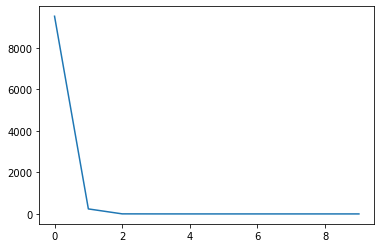

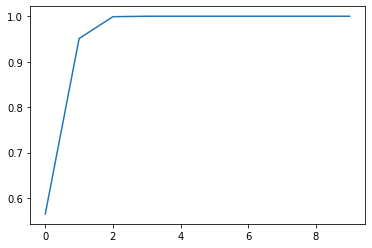

In [31]:
plt.plot(losses)
plt.show()
plt.plot(accs)